# Naive CV

#### Implementing basic image processing functions using numpy

#### Contributors:
<br>
<div style="background-color: rgba(0,0,0,0.05); padding: 1px;">
    <ul>
        <li><span>George Magued | 37 - 0930</span></li>
        <li><span>Youssef Tarek | 37 - 3865</span></li>
    </ul>
</div>

Below are displayed the two images on which we will carry out our operations.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as matimage
import imageio

In [2]:
def load_image(file) :
    img = Image.open(file)
    img.load()
    data = np.asarray(img, dtype="int16")
    return data

In [3]:
def save_image(array, filename):
    matimage.imsave(filename, array, cmap=cm.gray)

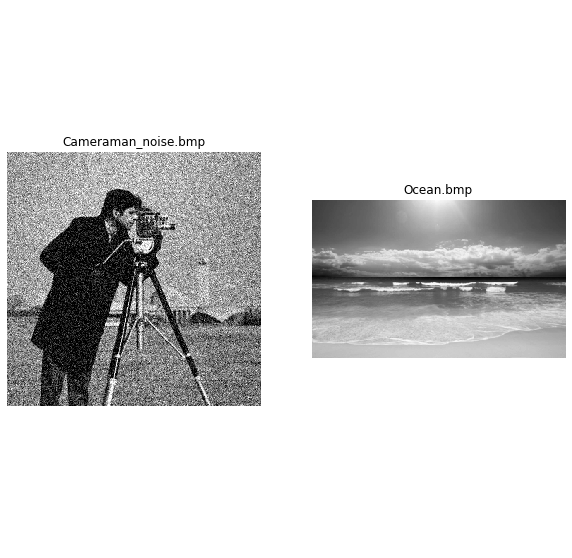

In [4]:
cameraman = load_image("images/Cameraman_noise.bmp")
ocean = load_image("images/Ocean.bmp")

fig = plt.figure()
fig.set_size_inches(10, 10)
plt.axis('off')
fig.add_subplot(1,2, 1).set_axis_off()
plt.title("Cameraman_noise.bmp")
plt.imshow(cameraman, cmap=cm.gray)
fig.add_subplot(1,2, 2).set_axis_off()
plt.title("Ocean.bmp")
plt.imshow(ocean, cmap=cm.gray)
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.4); text-align:center; vertical-align: middle; padding:40px 0;color:rgb(255,255,255);">
<h1>Problem 1</h1>
</div>


### Co-occurence Matrix
computing the co-occurence matrix of a numpy array through comparing each horizontal neighboring pixels

In [5]:
def co_occurence(image):
    unique_values = np.unique(image)
    size = unique_values.shape[0]
    matrix = np.zeros(shape=(size, size))
    rows, columns = image.shape
        
    for i in range(1, rows):
        for j in range(columns):            
            checking = image[i][j]
            againist = image[i - 1][j]
            
            x, = np.where(unique_values == checking)
            y, = np.where(unique_values == againist)
            matrix[y, x] += 1
    
    return matrix, unique_values

#### Co-occurance matric exmaples

In [6]:
array1 = np.array([[4, 5, 6, 7, 8], [4, 5, 6, 7, 8], [4, 5, 6, 7, 8],[4, 5, 6, 7, 8]])
co_occurence(array1)

(array([[3., 0., 0., 0., 0.],
        [0., 3., 0., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 3., 0.],
        [0., 0., 0., 0., 3.]]), array([4, 5, 6, 7, 8]))

In [7]:
array2 = np.array([[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7]])
co_occurence(array2)

(array([[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 3., 0., 0., 0.],
        [0., 0., 0., 0., 3., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0.]]), array([1, 2, 3, 4, 5, 6, 7]))

In [8]:
array3 = np.array([[4, 6, 8, 5, 4], [5, 5, 8, 7, 7], [6, 7, 7, 7, 9] , [8, 8, 4, 8, 6], [9, 8, 9, 5, 6]])
co_occurence(array3)

(array([[0., 1., 0., 1., 0., 1.],
        [0., 0., 1., 2., 0., 0.],
        [0., 1., 1., 0., 1., 0.],
        [1., 0., 0., 1., 2., 1.],
        [0., 1., 0., 1., 2., 1.],
        [0., 0., 1., 0., 0., 0.]]), array([4, 5, 6, 7, 8, 9]))

### Contrast
finding the contrast of an image using the co-occurance matrix

In [9]:
def contrast(image):
    co_matrix, unique_values = co_occurence(image)
    size = unique_values.shape[0]
    
    value = 0
    
    for i in range(size):
        for j in range(size):
            value += co_matrix[i][j] * (unique_values[i] - unique_values[j])**2
    return value

#### Contrast examples

In [10]:
print("Contrast for Ocean image:")
contrast(ocean)

Contrast for Ocean image:


9631290.0

#### Changing the contrast of the image based on the following graph having dynamic values
<img src="./images/contrast.png" />

In [11]:
np.vectorize?

In [12]:
def change_contrast_step(x):
    if(x <= A):
        return (B/A)*x
    if(x <= C):
        return (((D-B)*(x-A))/(C-A))+B
    else:
        return ((255-D)/(255-C))*(x-C)+D
    
change_contrast = np.vectorize(change_contrast_step)

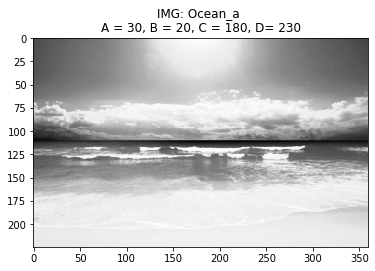

In [13]:
A = 30
B = 20
C = 180
D = 230

ocean_contrast_a = change_contrast(ocean)
save_image(ocean_contrast_a, "output/Ocean_a.jpg")
plt.title("IMG: Ocean_a \nA = 30, B = 20, C = 180, D= 230")
plt.imshow(ocean_contrast_a, cmap=cm.gray)

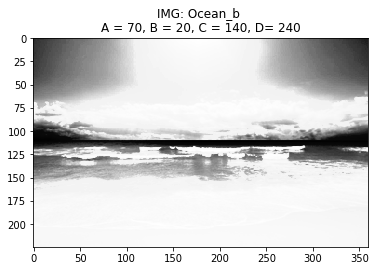

In [14]:
A = 70
B = 20
C = 140
D = 240

ocean_contrast_b = change_contrast(ocean)
save_image(ocean_contrast_b, "output/Ocean_b.jpg")
plt.title("IMG: Ocean_b \nA = 70, B = 20, C = 140, D= 240")
plt.imshow(ocean_contrast_b, cmap=cm.gray)

#### comparing the contrast values of image 1 and image 2

In [15]:
contrastA = contrast(ocean_contrast_a)
contrastB = contrast(ocean_contrast_b)
contrastOcean = contrast(ocean)

print("Ocean: ", contrastOcean, "\nOcean_a: ", contrastA, "\nOcean_b: ", contrastB)
np.savetxt(r'output/contrast.txt', [contrastA, contrastB], fmt='%d')

Ocean:  9631290.0 
Ocean_a:  12249485.697777947 
Ocean_b:  23383369.93094426


A and the original image have close contrast values, since we applied a light contrast effect and both images are not distinguishable. Howeever, the contrast effect in B is much richer and can be noticed by the naked eye. Hence, the great difference between the contrast values of the original image and that of B.

Contrasts for both images <span style="background-color:rgba(0,0,0,0.05);padding: 5px;">Ocean_a</span> and <span style="background-color:rgba(0,0,0,0.05);padding: 5px;">Ocean_b</span> are written <span style="background-color:rgba(0,0,0,0.1);padding: 5px;">contrast.txt</span> respectively.

<div style="background-color:rgba(0, 0, 0, 0.4); text-align:center; vertical-align: middle; padding:40px 0;color:rgb(255,255,255);">
<h1>Problem 2</h1>
</div>

#### a) Integral Image
Takes as an input the image numpy array and returns a numpy array representing the integral image of the input.

In [16]:
def integral_image(image):
    s = image.cumsum(axis = 0)
    ii = s.cumsum(axis = 1)
    return ii

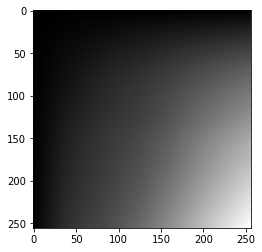

In [17]:
ii = integral_image(cameraman)
save_image(ii, "output/Camera_Integ.jpg")
plt.imshow(ii, cmap=cm.gray)

#### b) Average filter for noise removal
Implementing an average filter for noise removal that uses the function you wrote in the exercise above.

In [18]:
def compute_filter_value(i, j, integral_image, filter_size):
    x_size, y_size = integral_image.shape    
    extend = filter_size // 2
    
    AddI = (i + extend)
    AddJ = (j + extend)
    MinusI = (i - extend - 1)
    MinusJ = (j - extend - 1)
    
    if(AddJ >= x_size):
        AddJ = x_size - 1 
    if(AddI >= y_size):
        AddI = y_size - 1
    
    target = 0
    top_left = 0
    left = 0
    top = 0
    
    target = integral_image[AddI][AddJ]
    if(MinusI >= 0):
        left = integral_image[MinusI][AddJ]
    if(MinusJ >= 0):
        top = integral_image[AddI][MinusJ]
    if(MinusI >= 0 and MinusJ >= 0):
        top_left = integral_image[MinusI][MinusJ]                                
    
    summation = target + top_left - left - top
    return summation

In [19]:
def average_filter(image, filter_size):
    x_size, y_size = image.shape
    filtered_image = np.zeros(shape=image.shape)
    padding = (filter_size//2)
    ii = integral_image(image)
    for i in range(x_size):
        for j in range(y_size):
            sum_filter_value = compute_filter_value(i, j, ii, filter_size)
            filtered_value = (1 / filter_size ** 2) * sum_filter_value
            filtered_image[i][j] =  255 if filtered_value > 255 else (0 if filtered_value < 0 else filtered_value)
    return filtered_image

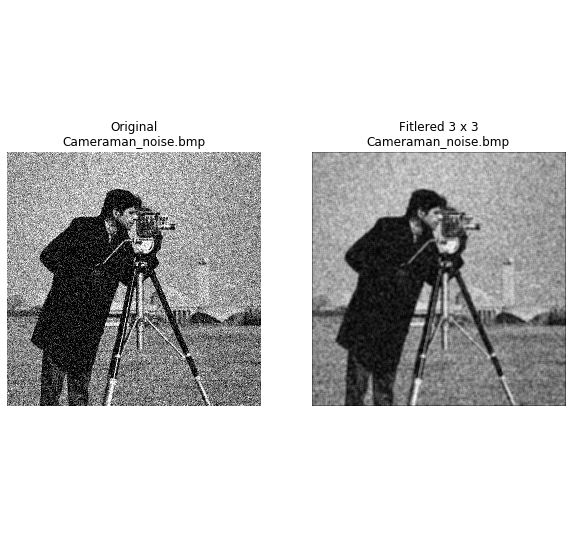

In [20]:
cameraman_filtered_3 = average_filter(cameraman, 3)
save_image(cameraman_filtered_3, "output/Camera_Filt_3.jpg")
fig = plt.figure()
fig.set_size_inches(10, 10)
plt.axis('off')
fig.add_subplot(1,2, 1).set_axis_off()
plt.title("Original\nCameraman_noise.bmp")
plt.imshow(cameraman, cmap=cm.gray)
fig.add_subplot(1,2, 2).set_axis_off()
plt.title("Fitlered 3 x 3\nCameraman_noise.bmp")
plt.imshow(cameraman_filtered_3, cmap=cm.gray)
plt.show()

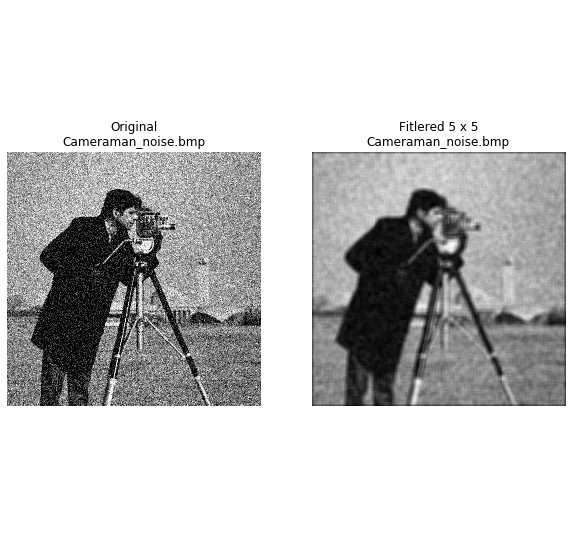

In [21]:
cameraman_filtered_5 = average_filter(cameraman, 5)
save_image(cameraman_filtered_5, "output/Camera_Filt_5.jpg")
fig = plt.figure()
fig.set_size_inches(10, 10)
plt.axis('off')
fig.add_subplot(1, 2, 1).set_axis_off()
plt.title("Original\nCameraman_noise.bmp")
plt.imshow(cameraman, cmap=cm.gray)
fig.add_subplot(1, 2, 2).set_axis_off()
plt.title("Fitlered 5 x 5\nCameraman_noise.bmp")
plt.imshow(cameraman_filtered_5, cmap=cm.gray)
plt.show()

#### c) Comparison between the convolution method and the integral image
Using the integral image saved alot of computation power, because all the pixels intensities of the <span style="background-color:rgba(0,0,0,0.05);padding: 5px;">Cameraman_Noise</span> image were cumulatively summed up and stored in the **integral_image** variable. Thus, instead of using **double for loops** in each iteration for the corresponding pixel of the filtered image calculation, _(having a time complexity of O(n) where n is the filter matrix size)_ , we used the values stored previously in **integral_image** _(having a time complexity of O(1))_ through getting an area's cumulative intensity.

Integral image filter introduced space and time complexity optimization through saving nearly half the computation power (iterations and calculations) to apply a certain filter over an image compared to the standard convolution method.